<a href="https://colab.research.google.com/github/rvtovar/sales_predictions/blob/main/sales_predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [170]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [171]:
df = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vRuRgiZaLcdq_937t8Psne-9AWR5VwSQYnt6PgMdDPFaVdOeP4xxA9h7_2mAYEsh8DOYzoh0XAqeQa0/pub?gid=2071196080&single=true&output=csv')
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [172]:
# how many rows and columns (8523 rows, 12 columns)
df.shape


(8523, 12)

In [173]:
#data types of each variable
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [174]:
#testing for duplicates
df.duplicated().sum()

# no duplicates found

0

In [175]:
#missing data 
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [176]:
#filling in missing item_weights with the average item weight, there are a significant amount missing so i felt like the best courese of action was to use the mean

weight_mean = df["Item_Weight"].mean()
df['Item_Weight'].fillna(weight_mean, inplace=True)

In [177]:
df.isna().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [178]:
# As for outlet size we are going to use the most common one found, to substitute the data that is missing

df['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [179]:
df['Outlet_Size'].fillna('Medium', inplace=True)

In [180]:
df.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [181]:
df['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [182]:
#fixing inconsistencies in Item Fat Content
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('LF', 'Low Fat')
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('reg', "Regular")
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('low fat', 'Low Fat')

df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [183]:
# now looking at item types
df['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [184]:
#looking at outlet_location_Type
df['Outlet_Location_Type'].value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

In [185]:
#Looking at Outlet_type
df['Outlet_Type'].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

In [186]:
# Now looking at summmary Statistics

df.describe().transpose().round(2)

,count,mean,std,min,25%,50%,75%,max
Item_Weight,8523.0,12.86,4.23,4.56,9.31,12.86,16.00,21.35
Item_Visibility,8523.0,0.07,0.05,0.00,0.03,0.05,0.09,0.33
Item_MRP,8523.0,140.99,62.28,31.29,93.83,143.01,185.64,266.89
Outlet_Establishment_Year,8523.0,1997.83,8.37,1985.00,1987.00,1999.00,2004.00,2009.00
Item_Outlet_Sales,8523.0,2181.29,1706.50,33.29,834.25,1794.33,3101.30,13086.96


In [187]:
# Setting up Default Settings for plots
sns.set_context('talk')
plt.style.use(['bmh', 'seaborn'])
plt.rcParams['font.family'] = 'serif'

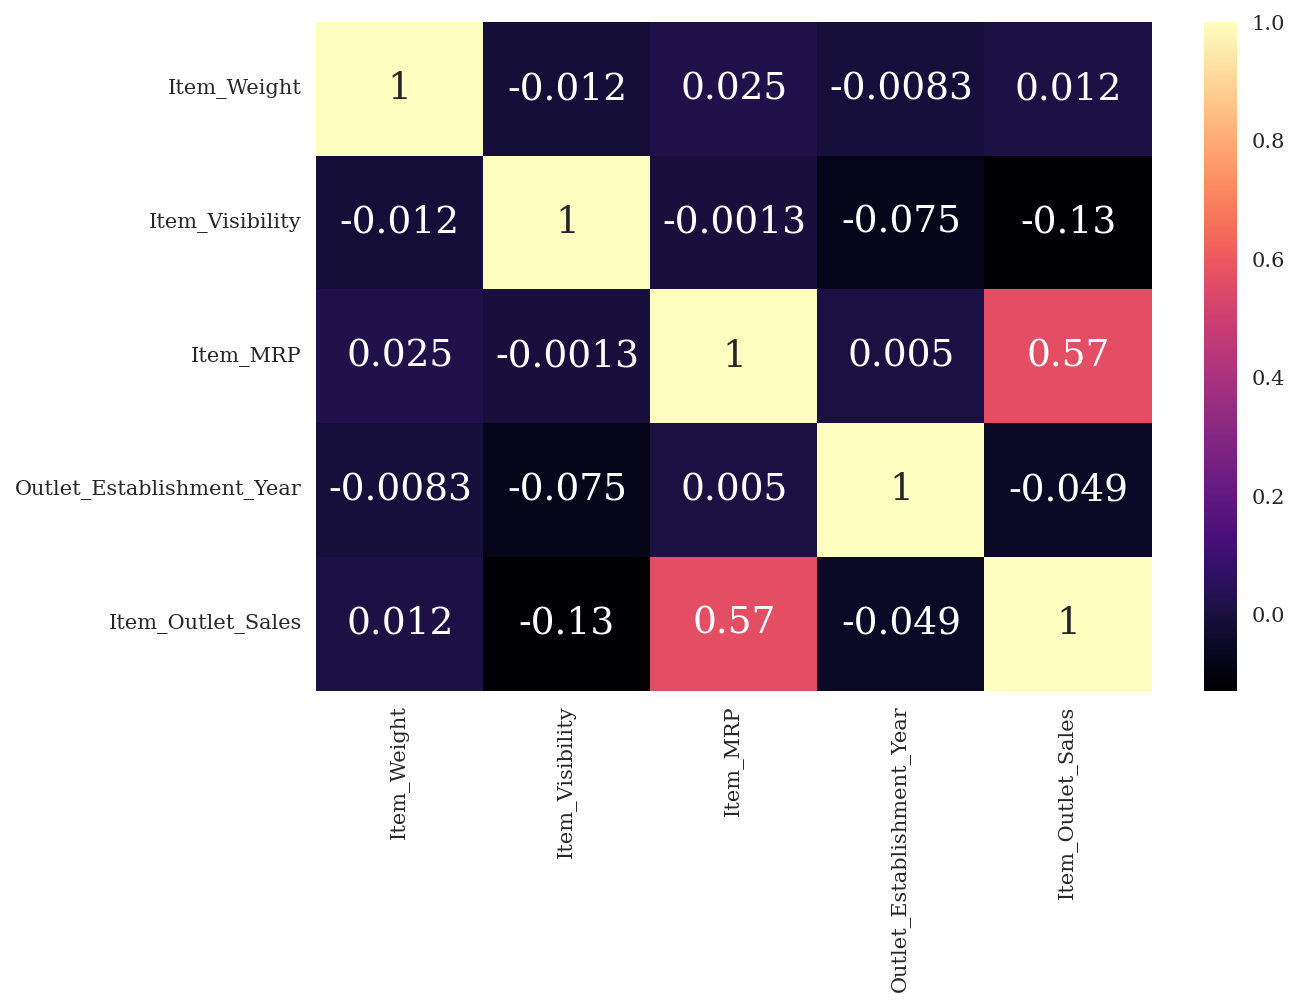

In [188]:
corr = df.corr()
plt.figure(dpi=150)
sns.heatmap(corr, annot=True, cmap='magma')

# The first thing i wanted to do is explore the correlations and which areas have the most correlation.
# We can see that there is a moderate correlation between Item_MRP and Item Outlet Sales. 
# Everwhere else has a no correlation . 

### In the following we are going to create histograms to view distrubtions of features

Text(0.5, 1.0, 'Item Weight Distribution')

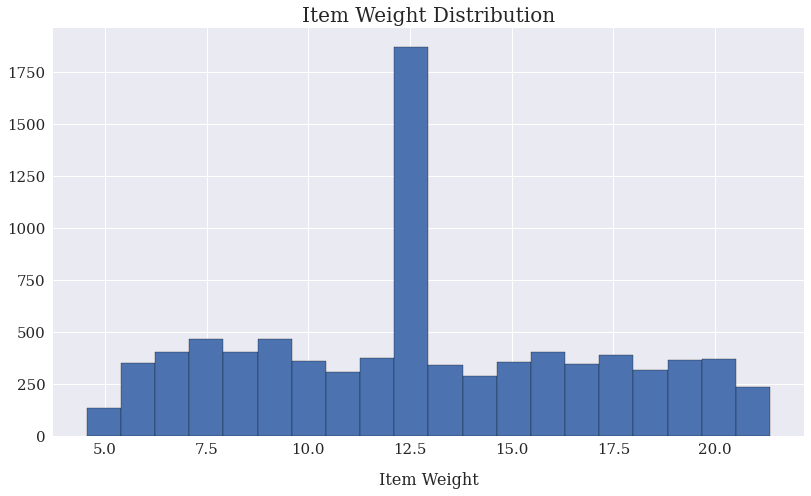

In [189]:
# The distrubtion of item weights, the large amount of 12.5 weights comes from replacing data that was missing
fig, ax = plt.subplots(figsize=(12,7))
df["Item_Weight"].hist(edgecolor='black', bins=20, ax=ax)
ax.set_xlabel("Item Weight", fontsize=16, labelpad=15)
ax.tick_params(axis = 'both', which = 'major', labelsize = 15)
ax.set_title("Item Weight Distribution", fontsize='20')

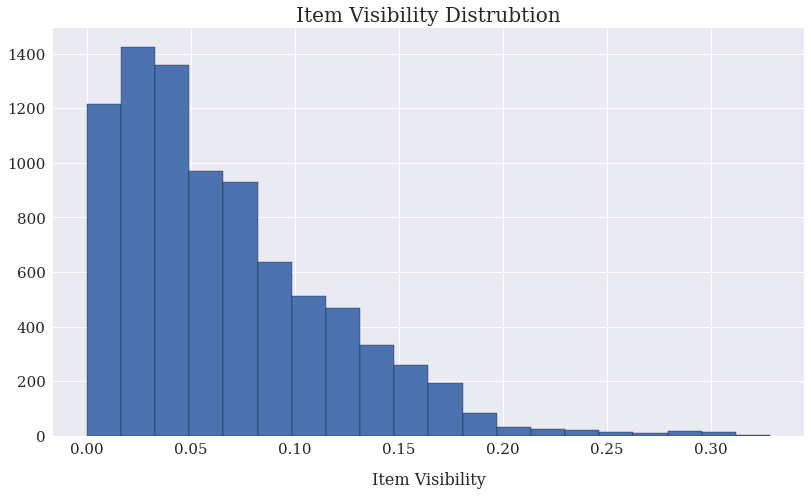

In [190]:
# item Visibility
fig, ax = plt.subplots(figsize=(12,7))
df["Item_Visibility"].hist(edgecolor='black', bins=20, ax=ax)
ax.set_xlabel("Item Visibility", fontsize=16, labelpad=15)
ax.set_title('Item Visibility Distrubtion', fontsize=20)
ax.tick_params(axis = 'both', which = 'major', labelsize = 15)

# This visualiztion shows us that many of these items have 0 to .15 Visibility

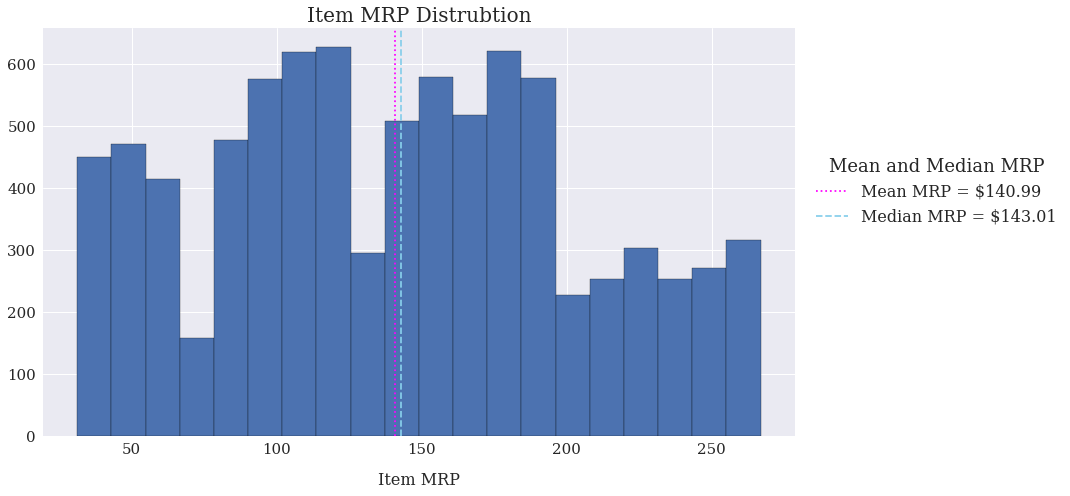

In [196]:
#item mrp
fig, ax = plt.subplots(figsize=(12,7))
df["Item_MRP"].hist(edgecolor='black', bins=20, ax=ax)
ax.set_xlabel("Item MRP", fontsize=16, labelpad=15)
ax.set_title('Item MRP Distrubtion', fontsize=20)

mean_mrp = df['Item_MRP'].mean()
med_mrp = df['Item_MRP'].median()

ax.axvline(mean_mrp,color='magenta', ls=':', label=f"Mean MRP = ${mean_mrp:,.2f}",);
ax.axvline(med_mrp,color='skyblue', ls='--', label=f"Median MRP = ${med_mrp:,.2f}");
ax.tick_params(axis = 'both', which = 'major', labelsize = 15)

ax.legend(loc=(1.02, .5), fontsize=16, title="Mean and Median MRP")
#Most of the MRPs rum between 50 to 200. With a few dips at what loosk to be points 75 and 125. 
#Once we get past 200 the MRP counts remain on the low side meaning many of items do not have 
# an mrp of above 200. 

### Box Plots to view Statiscal Summaries

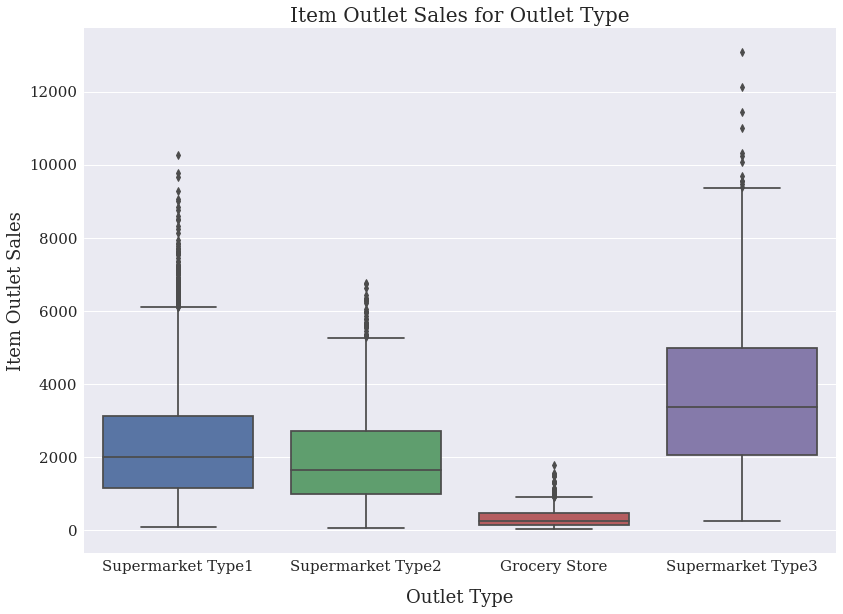

In [192]:
# Box plot of item outlet sales and Item Type
fig, ax = plt.subplots(figsize=(12,9))
sns.boxplot(data=df, x="Outlet_Type", y="Item_Outlet_Sales", ax=ax)
ax.set_xlabel("Outlet Type", fontsize=18,labelpad=15)
ax.set_ylabel("Item Outlet Sales", fontsize=18)
ax.set_title('Item Outlet Sales for Outlet Type', fontsize=20)
ax.tick_params(axis = 'both', which = 'major', labelsize = 15)
 #We can look and tell there are many outliers for each of the outlet types
  #The mediam outlet sales is much lower than the supermarket types. Which is to be expected
  #since they most likely sell groceries. What i find interesting is type 2 has a lower median than type 1
  #Which means type 2 sees less sales than type 1 and type 3. 

Text(0.5, 1.0, 'Item outlet sales for item Type')

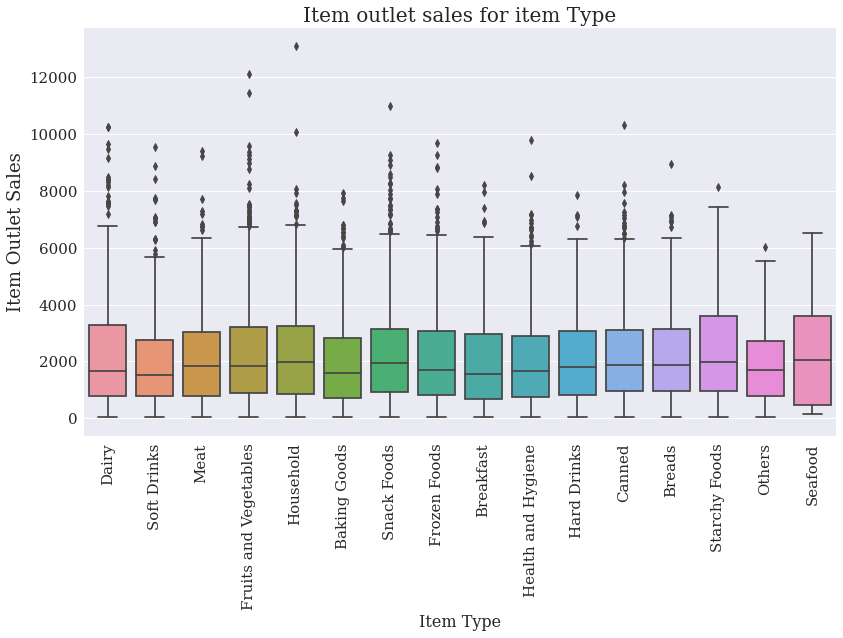

In [193]:
fig, ax = plt.subplots(figsize=(12,7))
sns.boxplot(data=df, x="Item_Type", y="Item_Outlet_Sales", ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_xlabel("Item Type", fontsize=16)
ax.set_ylabel("Item Outlet Sales", fontsize=18)
ax.tick_params(axis = 'both', which = 'major', labelsize = 15)

plt.title('Item outlet sales for item Type', fontsize=20)

  #Once again there are a significant amount of items that are outliers. We can see that the median sales
  #per item falls within the same range with some flucutation. 

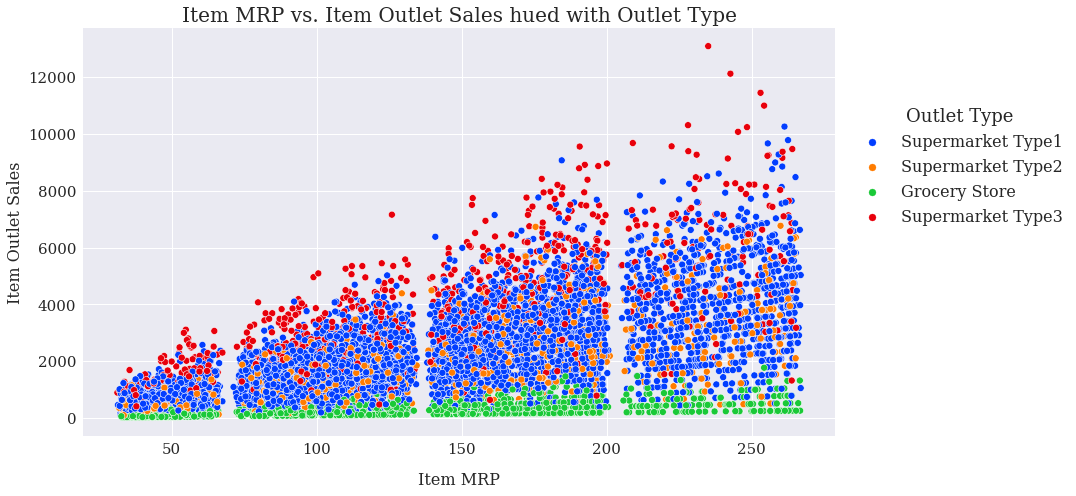

In [194]:
fig,ax = plt.subplots(nrows=1, ncols=1);
fig.set_size_inches(12, 7)
#ax.scatter(data=df, x="Item_MRP", y='Item_Outlet_Sales')
sns.scatterplot(data=df, x='Item_MRP', y="Item_Outlet_Sales", hue='Outlet_Type', palette='bright')
ax.set_xlabel('Item MRP', fontsize=16,labelpad=15)
ax.set_ylabel('Item Outlet Sales', fontsize=16)
ax.set_title('Item MRP vs. Item Outlet Sales hued with Outlet Type', fontsize=20);
ax.tick_params(axis='both', which='major', labelsize=15)
ax.legend(loc=(1.02, .5), fontsize=16, title="Outlet Type")
ax.tick_params(axis = 'both', which = 'major', labelsize = 15)

 #Looking at this plot we can see that the sales goes through a wider flucutation the larger the 
  #MRP is. with a low MRP item sales go between 0 and 2000, while if MRP goes to 250 we go from 0 to 12000. So
  #the higher the MRP the chance for higher sales on an item is. 
  #We can also look at the hue and tell that grocery stores sell the less , while supermarket type 3 sells the most
  # As for supermarket type2 and 3 they seem to be randomly distrubted in the middle sctions. with type 1 supermarkets getting
  # higher sells when they have higher item MRP. 

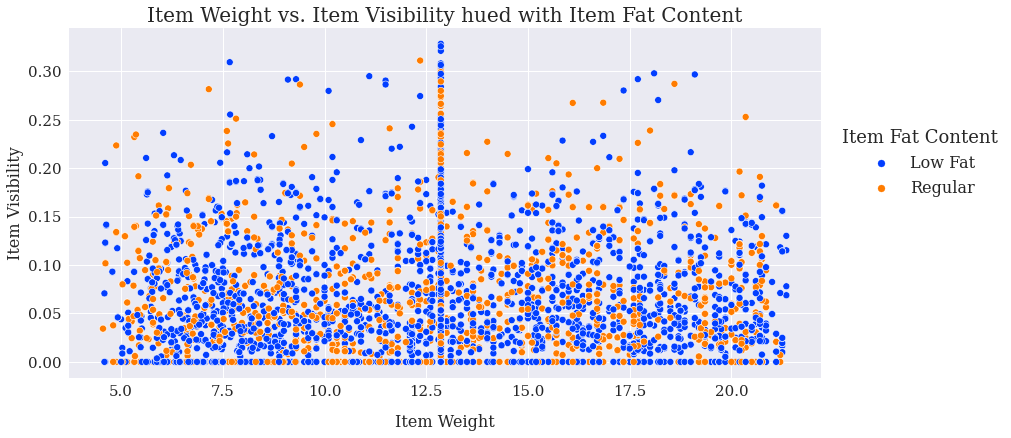

In [195]:
fig,ax = plt.subplots(nrows=1, ncols=1);
fig.set_size_inches(12, 6)
sns.scatterplot(data=df, x="Item_Weight", y="Item_Visibility", hue="Item_Fat_Content", palette='bright')
ax.set_xlabel('Item Weight', fontsize=16, labelpad=15)
ax.set_ylabel('Item Visibility', fontsize=16)
ax.set_title('Item Weight vs. Item Visibility hued with Item Fat Content', fontsize=20);
ax.tick_params(axis='both', which='major', labelsize=15)
ax.tick_params(axis = 'both', which = 'major', labelsize = 15)
ax.legend(loc=(1.02, .5), fontsize=16, title="Item Fat Content")

#For this plot I wanted to take a look the scatter plot between Item weight and Visibility. Then apply a hue
# so we can look at the distrubtuion of how the fat content is spread through out that disturbtion. We can see that
# the item fat content is randomly distubuted throughout the scatter plot and there is no clear correaltion
# between Item Weight and Item Visibility. 
# One interesting thing that has occured in this plot is the straight line going at 12.5 in item weight. this line is 
# side effect of missing data being imputed from earlier in the project. 